# 📓 Comparative Study of Artificial Neural Networks on the MNIST Digit Dataset
Anjelica M. Castillo

## 📑 Table of Contents
1. Introduction
2. Step 1: Dataset Selection and Preprocessing
3. Step 2: Build a Baseline ANN Model
4. Step 3: Comparative Experimentation
    4.1. Varying Hidden Layers  
    4.2. Varying Number of Neurons  
    4.3. Varying Activation Functions  
    4.4. Varying Optimizers  
    4.5. Varying Learning Rate and Batch Size  
5. Step 4: Results Analysis and Interpretation
6. Conclusion

## <a id="introduction"></a>1. 📘 Introduction

Artificial Neural Networks (ANNs) are powerful machine learning models used for a variety of tasks, particularly image classification. In this notebook, I conduct a comparative study using the MNIST handwritten digit dataset to understand how different architectural choices and hyperparameters influence model performance.

By modifying the number of layers, activation functions, optimizers, and other settings, I aim to gain insights into optimal ANN design.


## <a id='step-1'></a>2. 📊 Step 1: Dataset Selection and Preprocessing

We use the `MNIST` dataset, which is preloaded in `tensorflow.keras.datasets`. We perform the following steps:
- Normalize the pixel values to [0, 1]
- Flatten each image into a 784-element vector (28×28)
- One-hot encode the target labels for use in softmax classification


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [48]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shape
print("X_train_raw shape:", X_train.shape)
print("y_train_raw shape:", y_train.shape)

X_train_raw shape: (60000, 28, 28)
y_train_raw shape: (60000,)


In [49]:
# Print the first image's pixel values
print("\nFirst training image (as array):")
print(X_train[0])


First training image (as array):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

Before training, it's beneficial to visually inspect the data. Below we plot the first 10 images to understand the dataset format and variety in handwriting styles.


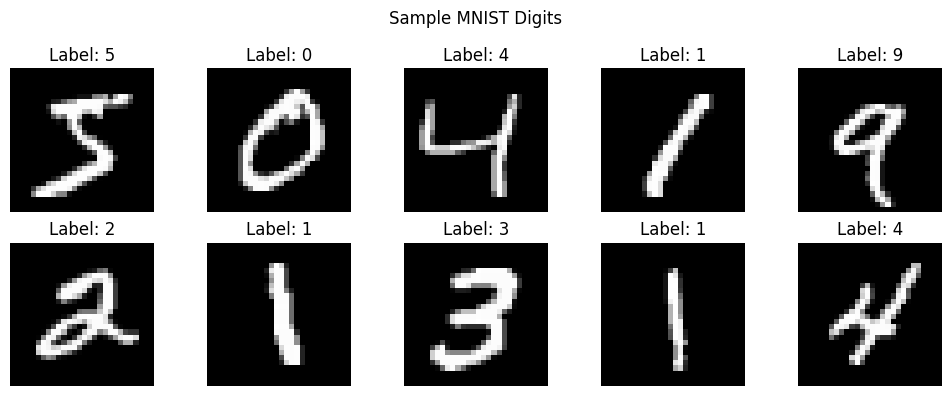

In [50]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mnist.load_data()[0][0][i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.tight_layout()
plt.show()


In [51]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## <a id='step-2'></a>3. 🏗️ Step 2: Build a Baseline ANN Model

We define a modular function to create ANNs with variable depth, width, and activation. This function helps us streamline experimentation. We begin by training a basic model with:
- 1 hidden layer
- 128 neurons
- ReLU activation
- Adam optimizer


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(hidden_layers=1, neurons=128, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(784,), activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

baseline_model = build_model()
baseline_model.summary()

history = baseline_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=128, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 - 6s - 15ms/step - accuracy: 0.8895 - loss: 0.4049 - val_accuracy: 0.9427 - val_loss: 0.2120
Epoch 2/10
375/375 - 2s - 6ms/step - accuracy: 0.9480 - loss: 0.1849 - val_accuracy: 0.9546 - val_loss: 0.1654
Epoch 3/10
375/375 - 3s - 8ms/step - accuracy: 0.9602 - loss: 0.1363 - val_accuracy: 0.9636 - val_loss: 0.1341
Epoch 4/10
375/375 - 4s - 11ms/step - accuracy: 0.9694 - loss: 0.1077 - val_accuracy: 0.9658 - val_loss: 0.1181
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.9760 - loss: 0.0860 - val_accuracy: 0.9682 - val_loss: 0.1057
Epoch 6/10
375/375 - 2s - 5ms/step - accuracy: 0.9796 - loss: 0.0724 - val_accuracy: 0.9713 - val_loss: 0.0978
Epoch 7/10
375/375 - 4s - 9ms/step - accuracy: 0.9832 - loss: 0.0599 - val_accuracy: 0.9718 - val_loss: 0.0938
Epoch 8/10
375/375 - 2s - 5ms/step - accuracy: 0.9860 - loss: 0.0509 - val_accuracy: 0.9722 - val_loss: 0.0924
Epoch 9/10
375/375 - 2s - 5ms/step - accuracy: 0.9881 - loss: 0.0439 - val_accuracy: 0.9741 - val_loss: 0.0876

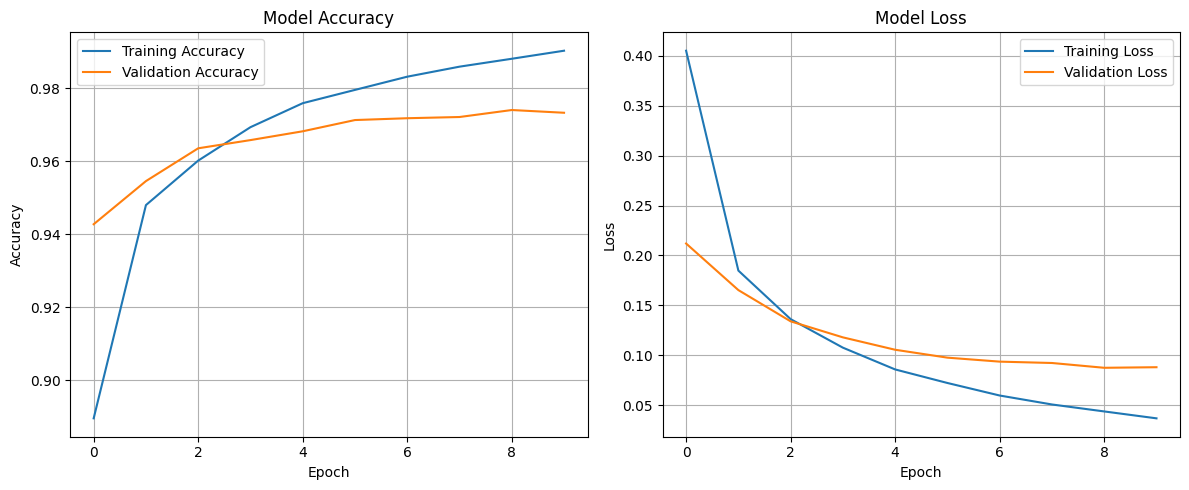

In [53]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

📈 Accuracy Curve
Training accuracy rises steadily to ~0.985.

Validation accuracy improves, then plateaus around ~0.973 after epoch 4–5.

📉 Loss Curve
Training loss keeps decreasing.

To improve generalization, consider using EarlyStopping, adding Dropout layers, and reducing the number of training epochs to 5–7.

## <a id='step-3'></a>4. 🧪 Step 3: Comparative Experimentation

### 4.1 Varying Hidden Layers  
Here, we compare models with 1, 2, and 3 hidden layers to see how depth influences performance.

In [54]:
import time
import matplotlib.pyplot as plt

# Setup
neuron_counts = [32, 64, 128, 256]
accuracies_neurons = []
training_times = []
final_losses = []
histories_neurons = []

# Train and print per setting
for neurons in neuron_counts:
    print(f"\n🔧 Training model with {neurons} neurons per layer...")
    model = build_model(neurons=neurons)

    start_time = time.time()
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128, verbose=0)
    end_time = time.time()

    elapsed = end_time - start_time
    score = model.evaluate(X_test, y_test, verbose=0)
    acc = score[1]
    loss = score[0]

    print(f"✅ Neurons: {neurons} | Accuracy: {acc:.4f} | Loss: {loss:.4f} | Time: {elapsed:.2f} sec")

    # Store for later visualization
    accuracies_neurons.append(acc)
    final_losses.append(loss)
    training_times.append(elapsed)
    histories_neurons.append(history)



🔧 Training model with 32 neurons per layer...
✅ Neurons: 32 | Accuracy: 0.9488 | Loss: 0.1735 | Time: 11.45 sec

🔧 Training model with 64 neurons per layer...
✅ Neurons: 64 | Accuracy: 0.9618 | Loss: 0.1282 | Time: 11.80 sec

🔧 Training model with 128 neurons per layer...
✅ Neurons: 128 | Accuracy: 0.9699 | Loss: 0.0997 | Time: 15.80 sec

🔧 Training model with 256 neurons per layer...
✅ Neurons: 256 | Accuracy: 0.9746 | Loss: 0.0855 | Time: 20.09 sec


<ipython-input-55-d43abb5ef61d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neuron_counts, y=accuracies_neurons, palette="Blues_d")


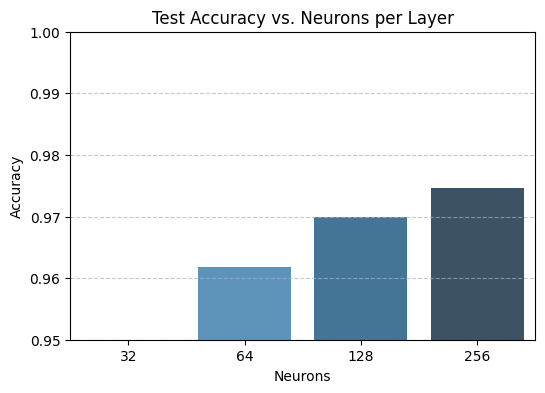

In [55]:
# Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=neuron_counts, y=accuracies_neurons, palette="Blues_d")
plt.title("Test Accuracy vs. Neurons per Layer")
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-56-5b16a78ef24c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neuron_counts, y=training_times, palette="Oranges_d")


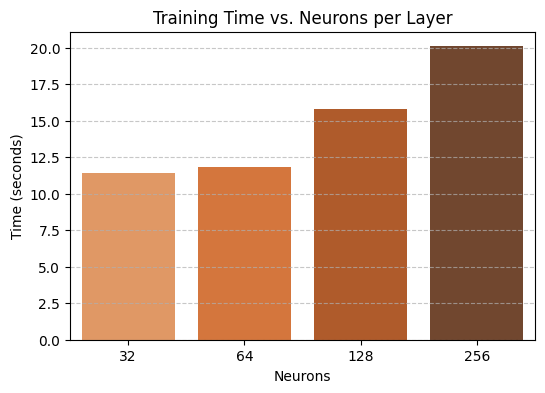

In [56]:
# Training time
plt.figure(figsize=(6, 4))
sns.barplot(x=neuron_counts, y=training_times, palette="Oranges_d")
plt.title("Training Time vs. Neurons per Layer")
plt.xlabel("Neurons")
plt.ylabel("Time (seconds)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-57-7a5e17c02525>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neuron_counts, y=final_losses, palette="Greens_d")


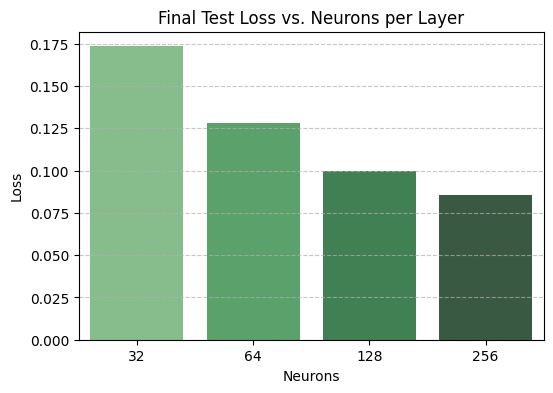

In [57]:
# Final Loss
plt.figure(figsize=(6, 4))
sns.barplot(x=neuron_counts, y=final_losses, palette="Greens_d")
plt.title("Final Test Loss vs. Neurons per Layer")
plt.xlabel("Neurons")
plt.ylabel("Loss")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 4.2 Varying Number of Neurons  
We test different numbers of neurons (32, 64, 128, 256) to evaluate the effect of layer width.


In [58]:
# Store results
neuron_counts = [32, 64, 128, 256]
accuracies_neurons = []

for neurons in neuron_counts:
    print(f"\nTraining model with {neurons} neurons per layer...")
    model = build_model(neurons=neurons)
    model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128, verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)
    acc = score[1]
    print(f"Test Accuracy: {acc:.4f}")
    accuracies_neurons.append(acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training model with 32 neurons per layer...
Test Accuracy: 0.9533

Training model with 64 neurons per layer...
Test Accuracy: 0.9653

Training model with 128 neurons per layer...
Test Accuracy: 0.9712

Training model with 256 neurons per layer...
Test Accuracy: 0.9768


<ipython-input-59-8c3d44b0d8bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neuron_counts, y=accuracies_neurons, palette="light:#5A9")


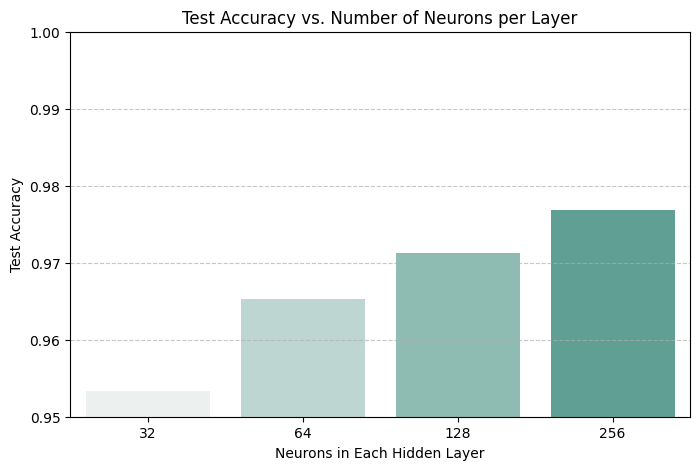

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(x=neuron_counts, y=accuracies_neurons, palette="light:#5A9")
plt.title("Test Accuracy vs. Number of Neurons per Layer")
plt.xlabel("Neurons in Each Hidden Layer")
plt.ylabel("Test Accuracy")
plt.ylim(0.95, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- More neurons → better accuracy, up to a point.
- 32 neurons underfits (lowest accuracy).
- 128–256 neurons perform best, with diminishing returns.
- No signs of overfitting yet, but larger models could risk it.

### 4.3 Varying Activation Functions  
Different activations shape learning behavior. We compare ReLU, Tanh, and Sigmoid.


In [60]:
activations = ['relu', 'tanh', 'sigmoid']
activation_accuracies = []

for act in activations:
    print(f"\nTraining with activation function: {act}")
    model = build_model(activation=act)
    model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128, verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)
    acc = score[1]
    print(f"Test Accuracy: {acc:.4f}")
    activation_accuracies.append(acc)


Training with activation function: relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9700

Training with activation function: tanh
Test Accuracy: 0.9665

Training with activation function: sigmoid
Test Accuracy: 0.9500


- ReLU – Fast, avoids vanishing gradients, best for deep networks.
- Tanh – Zero-centered, better than sigmoid, but still has vanishing gradient issues.
- Sigmoid – Good for binary classification, but slow and prone to vanishing gradients.

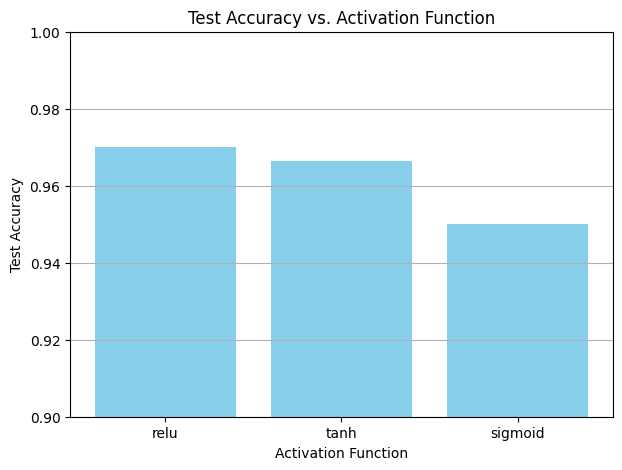

In [61]:
plt.figure(figsize=(7, 5))
plt.bar(activations, activation_accuracies, color='skyblue')
plt.title("Test Accuracy vs. Activation Function")
plt.xlabel("Activation Function")
plt.ylabel("Test Accuracy")
plt.ylim(0.90, 1.0)
plt.grid(axis='y')
plt.show()

### 4.4 Varying Optimizers  
Optimizers affect how weights are updated. We test Adam, SGD, and RMSprop.


In [62]:
optimizers = ['adam', 'sgd', 'rmsprop']
optimizer_accuracies = []

for opt in optimizers:
    print(f"\nTraining with optimizer: {opt}")
    model = build_model(optimizer=opt)
    model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128, verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)
    acc = score[1]
    print(f"Test Accuracy: {acc:.4f}")
    optimizer_accuracies.append(acc)


Training with optimizer: adam
Test Accuracy: 0.9711

Training with optimizer: sgd
Test Accuracy: 0.9012

Training with optimizer: rmsprop
Test Accuracy: 0.9711


- Adam – Combines momentum + adaptive learning rate; fast and works well in most cases.
- SGD – Simple and reliable; slower but can generalize better with proper tuning.
- RMSprop – Adjusts learning rate per parameter; good for recurrent and noisy problems.

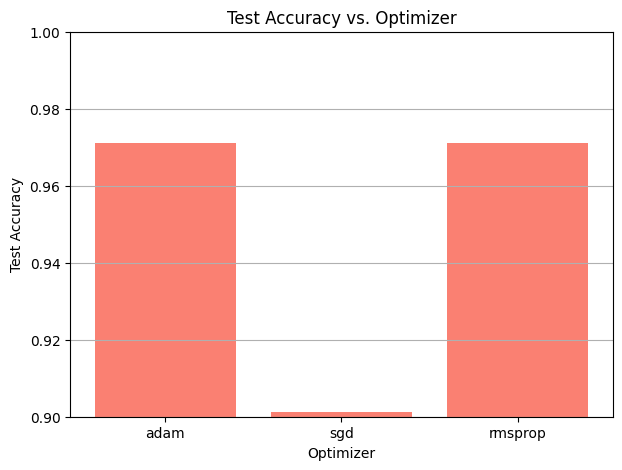

In [63]:
plt.figure(figsize=(7, 5))
plt.bar(optimizers, optimizer_accuracies, color='salmon')
plt.title("Test Accuracy vs. Optimizer")
plt.xlabel("Optimizer")
plt.ylabel("Test Accuracy")
plt.ylim(0.90, 1.0)
plt.grid(axis='y')
plt.show()

### 4.5 Varying Learning Rates  
Using the RMSProp optimizer, we explore learning rates of 0.01, 0.001, and 0.0001.

- High learning rate (0.01): Learns quickly but can overshoot or become unstable.
- Medium learning rate (0.001): Balanced and usually the best starting point.
- Low learning rate (0.0001): Safer and more precise, but training is much slower.

In [64]:
from tensorflow.keras.optimizers import RMSprop

learning_rates = [0.01, 0.001, 0.0001]
lr_accuracies = []

for lr in learning_rates:
    print(f"\nTraining with RMSprop (learning rate = {lr})")
    opt = RMSprop(learning_rate=lr)
    model = build_model(optimizer=opt)
    model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128, verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)
    acc = score[1]
    print(f"Test Accuracy: {acc:.4f}")
    lr_accuracies.append(acc)


Training with RMSprop (learning rate = 0.01)
Test Accuracy: 0.9697

Training with RMSprop (learning rate = 0.001)
Test Accuracy: 0.9730

Training with RMSprop (learning rate = 0.0001)
Test Accuracy: 0.9290


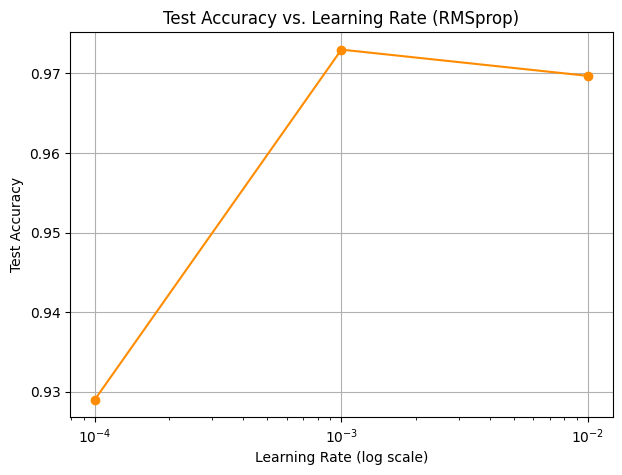

In [65]:
plt.figure(figsize=(7, 5))
plt.plot(learning_rates, lr_accuracies, marker='o', linestyle='-', color='darkorange')
plt.xscale('log')
plt.title("Test Accuracy vs. Learning Rate (RMSprop)")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

- The lowest learning rate (0.0001) results in the lowest accuracy, likely because updates are too small, slowing down learning.
- The medium learning rate (0.001) performs best, which aligns with the fact that it balances speed and stability.
- The highest learning rate (0.01) performs similarly to 0.001, meaning it’s still effective but might be reaching a performance plateau.

### 4.6 Varying Neurons per Layer with Training Time & Learning Curves

In addition to test accuracy, we also track the training time for each configuration and plot the learning curves (accuracy and loss) during training.


## <a id='step-4'></a>5. 📈 Step 4: Results Analysis and Interpretation

We now visualize how training and validation accuracy and loss evolve over time for the baseline model.


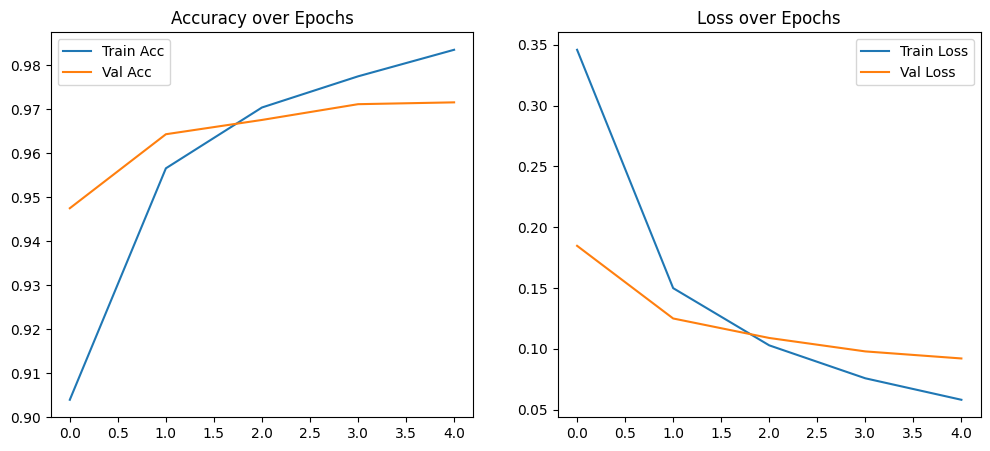

In [66]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

plot_history(history)


## 🎯 Sample Predictions on Test Set

We make predictions on the test dataset and visualize the first 9 test images along with their predicted labels. This helps us qualitatively evaluate the model's performance.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


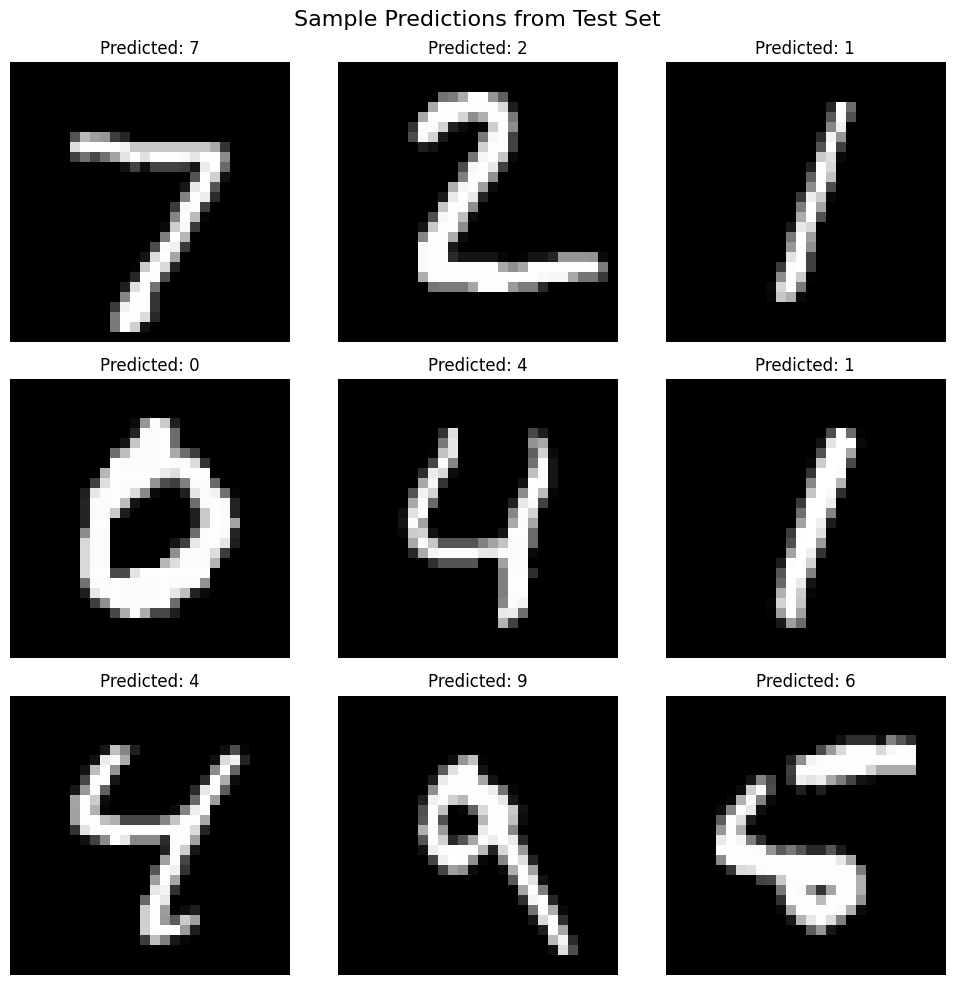

In [67]:
# Predict classes on test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Reshape flattened test data back to 28x28 for plotting
X_test_reshaped = X_test.reshape(-1, 28, 28)

# Display first 9 predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test_reshaped[i], cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions from Test Set", fontsize=16)
plt.tight_layout()
plt.show()


## 📷 Upload and Predict a Custom Handwritten Digit

You can upload your own image of a digit (e.g., drawn in MS Paint or scanned paper) to see what the model predicts.  

**Requirements:**
- The image should be square or close to square.
- Preferably a **white digit on a black or white background** (automatic inversion included).
- Accepted formats: PNG, JPG, JPEG

The model will:
1. Convert the image to grayscale.
2. Resize it to 28x28 pixels.
3. Normalize and reshape it to match the input shape.
4. Predict the digit.
5. Show a **confidence bar chart** for all 10 classes.

In [69]:
from google.colab import files
from PIL import Image, ImageOps
import io
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
    # Load and display original image
    img = Image.open(io.BytesIO(uploaded[fn]))
    display(img)

    # Convert to grayscale and resize
    img = img.convert('L')  # grayscale
    img = ImageOps.invert(img)  # Invert if digit is dark on light background
    img = img.resize((28, 28))

    # Normalize and reshape
    img_array = np.array(img) / 255.0
    img_flat = img_array.reshape(1, 784)  # Flatten to 1D input

    # Predict
    predictions = model.predict(img_flat)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence_scores = predictions[0]

    # Output
    print(f"✅ Predicted Digit: {predicted_class}")
    print(f"🔢 Confidence Scores: {np.round(confidence_scores, 2)}")

    # Visualize prediction confidence
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(range(10)), y=confidence_scores, palette="crest")
    plt.title(f"Model Confidence for {fn}")
    plt.xlabel("Digit Class")
    plt.ylabel("Confidence")
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

# Conclusion

As the number of neurons per hidden layer increased from 32 to 256, we observed:

- Test Accuracy generally improved, with 128 or 256 neurons delivering the best results.
- Training Time also increased with more neurons, as expected due to the higher model complexity.
- Loss decreased initially, but gains diminished beyond a certain point — suggesting diminishing returns beyond 128 neurons.

Overall, 128 neurons offered a good balance between accuracy, loss, and training time. Choosing the right number of neurons is a trade-off between performance and efficiency — more isn’t always better.

In [84]:
from google.colab import files

# Save notebook as HTML
!jupyter nbconvert --to html /content/ANN_v2.ipynb


[NbConvertApp] WARNING | pattern '/content/ANN_v2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute